In [1]:
# Initialize modules
!pip install pycaret
import pandas as pd

In [2]:
# Read barcodes dataset:
dataset = pd.read_csv('dataset_nb_10.csv',header=0,names=['barcode','ch1','ch2','ch3','ch4','ch5','ch6','ch_ref','sigma_ref','sigma1','sigma2','sigma3','sigma4','sigma5','sigma6'])

In [3]:
# Drop column to test data
#dataset = dataset.drop(columns=['sigma_ref'])

In [3]:
#check the shape of data
dataset.shape
dataset

,barcode,ch1,ch2,ch3,ch4,ch5,ch6,ch_ref,sigma_ref,sigma1,sigma2,sigma3,sigma4,sigma5,sigma6
0,1,0.000000,0.000000,0.000000,363.122246,0.000000,0.000000,608.722094,70.414842,0.000000,0.000000,0.000000,53.832964,0.000000,0.000000
1,1,0.000000,0.000000,0.000000,564.431405,125.947712,0.000000,718.998502,76.819436,0.000000,0.000000,0.000000,82.711503,46.071190,0.000000
2,1,0.000000,0.000000,0.000000,179.897243,69.366563,0.000000,424.021932,89.029909,0.000000,0.000000,0.000000,56.878302,51.599874,0.000000
3,1,0.000000,0.000000,0.000000,585.034999,127.631027,0.000000,760.527043,76.269169,0.000000,0.000000,0.000000,75.006023,56.004239,0.000000
4,1,0.000000,0.000000,0.000000,212.854240,0.000000,0.000000,377.445113,76.966435,0.000000,0.000000,0.000000,52.669980,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44246,10,0.000000,597.792457,266.426004,0.000000,288.550780,0.000000,1580.216382,87.587310,0.000000,71.344146,67.327934,0.000000,75.735816,0.000000
44247,10,0.000000,1803.349746,672.382359,862.871216,870.913905,180.985055,5282.986826,102.692551,0.000000,81.455374,80.828925,84.525713,99.317247,54.389311
44248,10,2087.531122,20985.456180,6896.606954,4578.989611,4890.257129,1686.537237,42523.323921,92.302742,94.401056,86.223423,88.216119,86.895796,71.335487,78.566020
44249,10,0.000000,768.799022,0.000000,306.340831,274.653046,0.000000,1335.891813,82.951517,0.000000,84.925981,0.000000,62.582246,80.222290,0.000000


In [4]:
# Prepare data for training
data = dataset.sample(frac=0.8, random_state=786) # shuffle and separate 80%
data_unseen = dataset.drop(data.index) # get the rest for testing
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (35401, 15)
Unseen Data For Predictions: (8850, 15)


In [5]:
from pycaret.classification import *

#exp_clf101 = setup(data = data, target = 'barcode') # NOT NORMALIZED labels are in the barcode column
exp_clf101 = setup(data = data, target = 'barcode', normalize = True) # NORMALIZED (default = zscores)

#best_model = compare_models(turbo=False)
top_3 = compare_models(exclude = ['gpc'], turbo=False, n_select = 3) # Trains all models bypassing time limit and exclude the classifier with memory issues

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
mlp,MLP Classifier,0.8538,0.9897,0.8370,0.8555,0.8536,0.8350,0.8352,24.4300
lightgbm,Light Gradient Boosting Machine,0.8319,0.9869,0.8146,0.8327,0.8314,0.8103,0.8105,1.9370
rf,Random Forest Classifier,0.8181,0.9838,0.8004,0.8189,0.8167,0.7946,0.7950,1.6790
gbc,Gradient Boosting Classifier,0.8136,0.9839,0.7964,0.8151,0.8127,0.7896,0.7900,30.2850
et,Extra Trees Classifier,0.8105,0.9823,0.7937,0.8110,0.8089,0.7860,0.7864,0.9950
rbfsvm,SVM - Radial Kernel,0.7956,0.9830,0.7751,0.8040,0.7943,0.7691,0.7701,17.8970
lr,Logistic Regression,0.7822,0.9791,0.7629,0.7855,0.7810,0.7543,0.7548,4.7220
knn,K Neighbors Classifier,0.7554,0.9437,0.7364,0.7558,0.7532,0.7239,0.7245,0.2720
dt,Decision Tree Classifier,0.7508,0.8608,0.7337,0.7511,0.7507,0.7190,0.7191,0.1690
svm,SVM - Linear Kernel,0.7488,0.0000,0.7240,0.7552,0.7437,0.7163,0.7181,0.2310


In [28]:
# print the best model
print(top_3[2])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2586, verbose=0,
                       warm_start=False)


In [6]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
#All feature importance plot
plot_model(blender, plot='feature_all')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [17]:
#Tune the model based on hyperparameters
for i in range(3):
    print(i)
    tuned_model[i] = tune_model(top_3[i], n_iter = 20) # default --> n_iter = 10

#tuned model object is stored in the variable 'tuned_model'. 
print(tuned_model[1])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8499,0.9902,0.8343,0.8510,0.8498,0.8305,0.8306
1,0.8547,0.9902,0.8378,0.8564,0.8549,0.8360,0.8361
2,0.8462,0.9896,0.8298,0.8473,0.8463,0.8264,0.8265
3,0.8596,0.9909,0.8404,0.8609,0.8596,0.8414,0.8415
4,0.8426,0.9879,0.8241,0.8450,0.8428,0.8223,0.8225
5,0.8584,0.9897,0.8393,0.8599,0.8583,0.8400,0.8402
6,0.8567,0.9904,0.8391,0.8569,0.8562,0.8382,0.8383
7,0.8551,0.9903,0.8350,0.8555,0.8544,0.8363,0.8365
8,0.8358,0.9887,0.8166,0.8377,0.8351,0.8145,0.8148
9,0.8527,0.9897,0.8359,0.8538,0.8527,0.8337,0.8338


NameError: name 'tuned_model' is not defined

In [8]:
#tuned_mlp, tuned_lightgbm, tuned_randomf
tuned_randomf = tune_model(top_3[2], n_iter = 20) # default --> n_iter = 10

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8128,0.9832,0.7961,0.8175,0.8101,0.7884,0.7893
1,0.8228,0.9846,0.8071,0.8269,0.8224,0.8000,0.8005
2,0.7902,0.9812,0.7722,0.7923,0.7874,0.7629,0.7637
3,0.8132,0.9836,0.7935,0.8173,0.8102,0.7888,0.7898
4,0.8031,0.9824,0.7871,0.8070,0.8011,0.7777,0.7785
5,0.7986,0.9829,0.7767,0.8025,0.7962,0.7724,0.7733
6,0.8067,0.9827,0.7909,0.8102,0.8051,0.7818,0.7824
7,0.8111,0.9828,0.7959,0.8149,0.8108,0.7868,0.7873
8,0.7926,0.9818,0.7761,0.7981,0.7916,0.7658,0.7665
9,0.7970,0.9822,0.7754,0.8009,0.7948,0.7706,0.7714


In [9]:
#save tuned top3 into an array
tuned_top3 = [0] * 3 #init array
tuned_top3[0]=tuned_mlp
tuned_top3[1]=tuned_lightgbm
tuned_top3[2]=tuned_randomf

In [13]:
print(tuned_top3[0])

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 50, 50], learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1653, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [14]:
#Blend models
blender = blend_models(tuned_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8604,0.9898,0.8452,0.8609,0.8599,0.8423,0.8425
1,0.8620,0.9904,0.8422,0.8633,0.8615,0.8441,0.8443
2,0.8418,0.9877,0.8243,0.8432,0.8413,0.8215,0.8218
3,0.8575,0.9894,0.8400,0.8589,0.8569,0.8391,0.8394
4,0.8539,0.9893,0.8341,0.8561,0.8536,0.8351,0.8354
5,0.8418,0.9899,0.8182,0.8429,0.8412,0.8214,0.8216
6,0.8535,0.9890,0.8369,0.8555,0.8534,0.8346,0.8348
7,0.8495,0.9890,0.8357,0.8542,0.8505,0.8302,0.8305
8,0.8487,0.9889,0.8327,0.8522,0.8485,0.8292,0.8296
9,0.8386,0.9885,0.8206,0.8397,0.8376,0.8177,0.8180


In [22]:
evaluate_model(blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

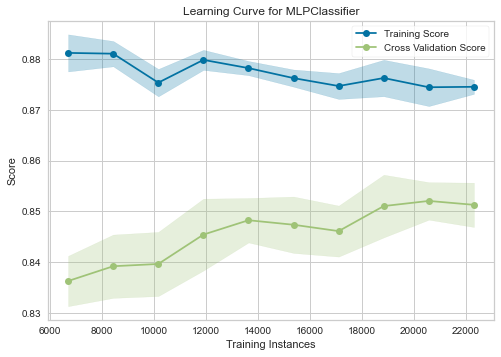

In [12]:
# Plot the model
plot_model(blender, plot='learning')

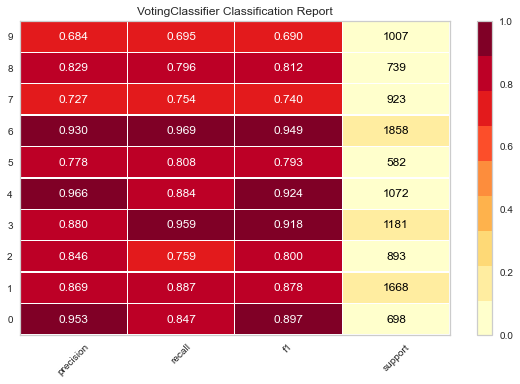

In [16]:
# Plot the model - show class report
plot_model(blender, plot='class_report')

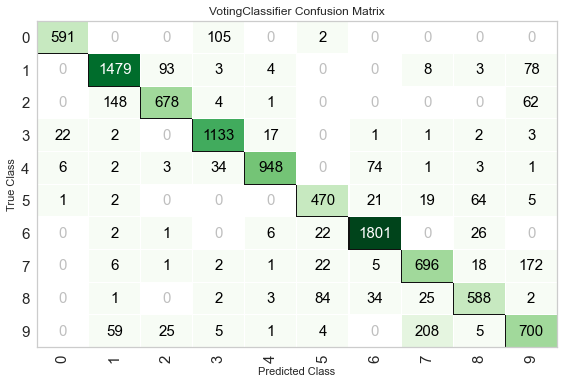

In [17]:
# Plot the model - show confusion matrix
plot_model(blender, plot = 'confusion_matrix')

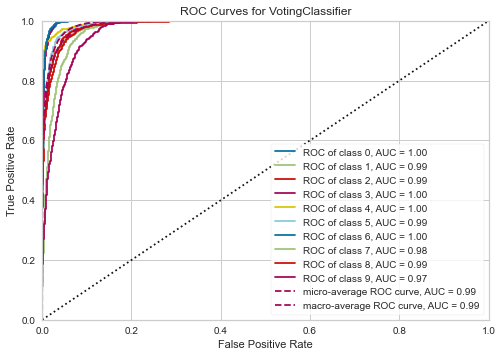

In [39]:
# Plot the model - AUC for ROC curve
plot_model(blender, plot = 'auc')

In [18]:
# Finalize Model for Deployment
final_model = finalize_model(blender)

#Final decision parameters for deployment
print(final_model)

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(activation='logistic', alpha=0.0001,
                                            batch_size='auto', beta_1=0.9,
                                            beta_2=0.999, early_stopping=False,
                                            epsilon=1e-08,
                                            hidden_layer_sizes=[100, 50, 50],
                                            learning_rate='adaptive',
                                            learning_rate_init=0.001,
                                            max_fun=15000, max_iter=500,
                                            momentum=0.9, n_iter_no_change=10,
                                            nesterovs_momentum=True,
                                            power_t=0.5, random_stat...
                                                     max_depth=11,
                                                     max_features='sqrt',
                

In [19]:
#Saving the model
save_model(final_model,'barcodes_consensus_2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='barcode',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                       max_features='sqrt',
                                                                       max_leaf_nodes=None,
                                                                       max_samples=None,
 

In [20]:
data_unseen.to_csv('unseen_data.csv')

In [21]:
# Predict on unseen data
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions.head() # see 5 (default) firts predictions, change n to see more or less predictions
unseen_predictions.to_csv('predictions.csv') # save predictions dataset to csv

# Output: ground truth + predictors (variables) + prediction + score (0-1)

In [23]:
# Loading the saved model and checking the prediction on the new data
saved_model = load_model('barcodes_consensus')
new_prediction = predict_model(saved_model, data = dataset) # here is another new set of data
new_prediction.head(n=3) # Check first n predictions

Transformation Pipeline and Model Successfully Loaded


,barcode,ch1,ch2,ch3,ch4,ch5,ch6,ch_ref,sigma_ref,sigma1,sigma2,sigma3,sigma4,sigma5,sigma6,Label,Score
0,1,0.0,0.0,0.0,363.122246,0.000000,0.0,608.722094,70.414842,0.0,0.0,0.0,53.832964,0.000000,0.0,1,0.8748
1,1,0.0,0.0,0.0,564.431405,125.947712,0.0,718.998502,76.819436,0.0,0.0,0.0,82.711503,46.071190,0.0,1,0.9670
2,1,0.0,0.0,0.0,179.897243,69.366563,0.0,424.021932,89.029909,0.0,0.0,0.0,56.878302,51.599874,0.0,1,0.9999


In [28]:
get_config(saved_model)

ValueError: Variable Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='barcode',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                                                              learning_rate=0.1,
                                                              max_depth=-1,
                                                              min_child_samples=96,
                                                              min_child_weight=0.001,
                                                              min_split_gain=0.2,
                                                              n_estimators=140,
                                                              n_jobs=-1,
                                                              num_leaves=30,
                                                              objective=None,
                                                              random_state=2586,
                                                              reg_alpha=0.005,
                                                              reg_lambda=0.05,
                                                              silent=True,
                                                              subsample=1.0,
                                                              subsample_for_bin=200000,
                                                              subsample_freq=0))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None)]],
         verbose=False) not found. Possible variables are: {'html_param', 'create_model_container', 'fold_shuffle_param', 'y_test', 'imputation_classifier', 'seed', '_ml_usecase', 'logging_param', 'iterative_imputation_iters_param', 'y', 'experiment__', 'master_model_container', 'X_test', '_all_models_internal', 'USI', 'data_before_preprocess', 'gpu_param', '_internal_pipeline', 'fold_generator', 'fold_groups_param_full', 'exp_name_log', 'target_param', 'transform_target_param', 'fix_imbalance_method_param', 'imputation_regressor', 'stratify_param', 'X_train', 'n_jobs_param', '_all_metrics', '_all_models', 'fix_imbalance_param', 'y_train', '_gpu_n_jobs_param', 'prep_pipe', 'log_plots_param', 'transform_target_method_param', 'fold_param', 'display_container', '_available_plots', 'fold_groups_param', 'pycaret_globals', 'X'}

In [ ]:
# More functions can be used in PyCaret to evaluate the model or to get the config of it, like get_config --> Read the docs!